In [2]:
using Gadfly, DataFrames, LightGraphs, StatsBase, ProgressMeter

In [3]:
#set_default_plot_size(12cm, 8cm)

# The Imitation Model

This presentation is broken into two parts:
1. Motivation
2. Fundamentals

## Part 1.
* In consideration of the meaning of intelligence, imitation is examined.


* Definition: Intelligence - "the ability to acquire and apply knowledge and skills."

* Definition: Knowledge - "facts, information, and skills acquired by a person through experience or education; the theoretical or practical understanding of a subject."

The idea is that intelligence allows the gathering of knowledge and skills; skills being knowledge stored in structures other than (but still employing the reasoning of) the neocortex i.e. muscles, the endocrine system, etc. 

What about the purpose?

Intelligence minimizes error (where error implies an adverse cost associated with the failure to optimize time collapsed-survival) via the efficient gathering of knowledge and skills.

* Consider Least squares and other techniques that attempt to learn from data.
* Data is all stimuli.
* Your dad, your mom, your TV.
* Polar bears are white

Life imitates other life such that it bypasses an inefficient phase of random trials.

### Error Minimization
Evolution: Generation dependent structural imitation.

Learning: Sub-generational structural imitation based on sensory stimuli.

Problem Solving
* Recognition of patterns (have I seen this).
   * If so apply learned pattern.
* Random trials.
   * Apply applicable techniques.
   * Catalog result for later use.

As an exercise try and imagine something that has components not made up of things you have seen, touched, tasted, felt, heard or smelled.

<img src ="img/choice.jpg" />

<img src="img/network.jpg" />

This research explores the nature of probabilistic imitation within a network. 

## Model
* Life survives by making decisions advantageous to its survival.
* Decisions are made by random trials, expert knowledge, or imitation.
* Expert knowledge can be stored and recalled genetically or during life.

These assumptions can be described probabilistically on a per decision basis

$$P(X_j) = \omega_eP_e(X_j) + \omega_sP_s(X_j) + \omega_rP_r(X_j)$$

where we seek the probability of making a decision between $X_j$, $j = 1,2,\dots,n$ 
and place different weight $\omega$ on expert knowledge, social influence, and random 
trials respectively.

## Relevant Research
### Agent_Zero [5]
Seeks to quantify social systems from a Neurocognitive basis.

$$D_{i}^{tot}(t) = V_i(t) + P_i(t)+ \sum_{j \neq i} \omega_{ji} (V_{j}(t) + P_{j}(t))$$

where $D_i(t)$ is the disposition of agent $i$ at time $t$ eligible to breach threshold $\tau_i$ and take action.

$V(t)$ is the emotional component based on the Rescorla-Wagner model of conditioning [1].

$P(t)$ is a rational or logical component.

The sum is the combination of social influence.

Model is not based on behavioral imitation.

### The Watts Cascading model [2]
We know this one.

Network based threshold model of behavorial imitation.

Exclusively considers the behavior of others.

Lacks Neurocognative foundation.

### Animal Research
Research targeting the specifics of animal behavior has found that uninformed (and thus easily manipulated agents) can prevent a strongly opinionated minority from swaying decisions by a group [4]. 

Other research has found that at least in fish, increasing the size of a group results in better decisions [3]. 

There are many results like this but how they tie into a general model is unclear.

## References
* [1] Robert A Rescorla, Allan R Wagner, et al. “A theory of Pavlovian condi-
tioning: Variations in the effectiveness of reinforcement and nonreinforce-
ment”. In: Classical conditioning II: Current research and theory 2 (1972),
pp. 64–99.


* [2] Duncan J Watts. “A simple model of global cascades on random networks”.
In: Proceedings of the National Academy of Sciences 99.9 (2002), pp. 5766–
5771.

* [3] David JT Sumpter et al. “Consensus decision making by fish”. In: Current
Biology 18.22 (2008), pp. 1773–1777.


* [4] Iain D Couzin et al. “Uninformed individuals promote democratic consen-
sus in animal groups”. In: science 334.6062 (2011), pp. 1578–1580.


* [5] Joshua M Epstein. Agent Zero: Toward Neurocognitive Foundations for
Generative Social Science. Princeton University Press, 2014.

## Part 1.
Imitation in a simple group (only the social component $\omega_sP_s(X_j)$).

### Rules
Consider a set of nodes $\Omega$ with a subset of nodes $M$ that move. We have $n = |\Omega|$ nodes and $m = |M|$ nodes move. 
* Each node $n_i \notin M$ can imitate a node that moved with probaility $p$. 
* Once a node has imitated another node it is considered "moved" for that turn and cannot moved again. 
* Who imitated who is lost.

In [4]:
function imitate(nodes::Int, prob::Float64, moved::Int)
    tot = 0
    for i in 1:(nodes - moved)
        for j in 1:moved
            if prob > rand() 
                tot = tot + 1 
                break
            end 
        end
    end
    tot
end

imitate (generic function with 1 method)

In [5]:
imitate(10, .4, 1)

4

Suppose we have $n$ nodes and $m$ moved. We wish to determine how many nodes will imitate at least one of the $m$ nodes and move themselves. Each node will imitate with probability $p$. The number of nodes available to imitate is $k = n - m$. We can think of each of these $k$ nodes as having $m$ chances to imitate a node that moved:

\begin{equation*}
  X_{t+1} \sim\binom{m_{t}}{x}p^x(1-p)^{m_{t}-x}
\end{equation*}

A node moves if it imitated at least one of the other nodes:

\begin{equation*}
  P(X_{t+1} \geq 1) = 1 - P(X_{t+1} < 1) = 1 - (1-p)^m_t = z_{t+1}
\end{equation*}

where $z_{t+1}$ is the probability a node moves. 

<img src="img/binom.jpg" />

The distribution representing the probability that $v_{t+1}$ nodes move is given by:

\begin{equation*}
    V_{t+1} \sim \binom{k_t}{v}z_{t+1}^v(1-z_{t+1})^{k_{t}-v}
\end{equation*}

Thus we can determine the expected number of nodes that will move:

\begin{equation*}
  \langle V_{t+1} \rangle = k_{t} - k_{t}(1 - p)^m_{t}
\end{equation*}

Note the variance decreases as $p$ increases:

\begin{equation*}
  \sigma_{t+1}^2 = \langle V_{t+1} \rangle(1-p)
\end{equation*}

We write the solution for later use.

In [6]:
function expectedMoves(n::Int, p::Float64, m::Int)
    k = n - m
    mean = k - k * (1 - p)^m
    var = mean * (1 - p)
    (mean, var)
end

expectedMoves (generic function with 1 method)

In [7]:
function expectedMovesSim(n::Int, p::Float64, m::Int, trials::Int)
    im = 0
    for i in 1:trials
        im = im + imitate(n, p, m)
    end
    im / trials
end

expectedMovesSim (generic function with 1 method)

In [8]:
n = 50
p = .5
m = 1
expectedMoves(n, p, m)

(24.5,12.25)

In [9]:
expectedMovesSim(n, p, m, 10^6)

24.501749

Let's see what happens as we travel across time. Kick a node and watch the rest imitate.

In [10]:
function catalyze(nodes::Int, prob::Float64, moved::Int, limit::Int = 10^4; force = true)
    record = [1]
    itr = 1
    while moved > 0 && itr < limit
        moved = imitate(nodes, prob, moved)
        push!(record, moved)
        if force && moved == 0
            moved = 1
        end
        itr = itr + 1
    end
    record
end

catalyze (generic function with 2 methods)

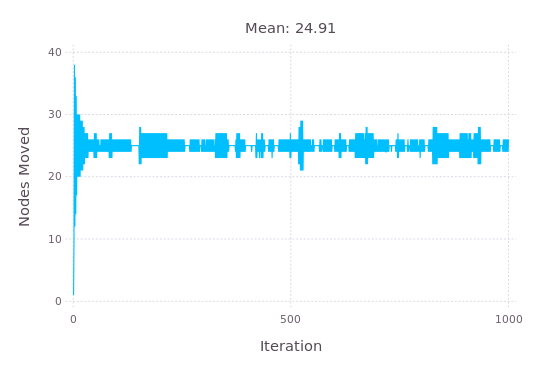

In [28]:
n, p, m = 50, .2, 1
record = catalyze(n, p, m, 10^3, force = false);
plot(x = [x for x = 1:length(record)], y = record, Geom.line,
Guide.ylabel("Nodes Moved"), Guide.xlabel("Iteration"), 
Guide.title("Mean: $(mean(record))"))

In [17]:
expectedMoves(n, p, 1)

(7.2,1.4399999999999997)

We can see that for large $p$ the initial condition dictates the outcome whereas smaller values imply a more stochastic process.

In [13]:
function simulate(folds::Int, totalnodes::Int, numprobs::Int, probstop::Float64)
    analysisnodes::Int = totalnodes - 1
    allmoves = Array{Float64}(analysisnodes, numprobs)
    alltime = Array{Float64}(analysisnodes, numprobs)
    probs = linspace(.01, probstop, numprobs)
    a = 1
    for p in probs, i in 2:totalnodes
        avgmoves = 0
        avgtime = 0
        for j in 1:folds
            record = catalyze(i, p, 1)
            avgmoves = avgmoves + (mean(record))
            avgtime = avgtime + length(record)
        end
        allmoves[a] = avgmoves / folds
        alltime[a] = avgtime / folds
        #print("|$i, $p: $(allmoves[a])")
        a = a + 1
    end
    (allmoves, alltime)
end

simulate (generic function with 1 method)

In [14]:
folds = 10
nodes = 30 
probs = 10
probstop = .99
probvalues = linspace(1//100, probstop, probs)
(moves, time) = simulate(folds, nodes, probs, probstop);

We run a more sophisticated simulation to find the average number of moves nodes will make (over 10 folds) over time.

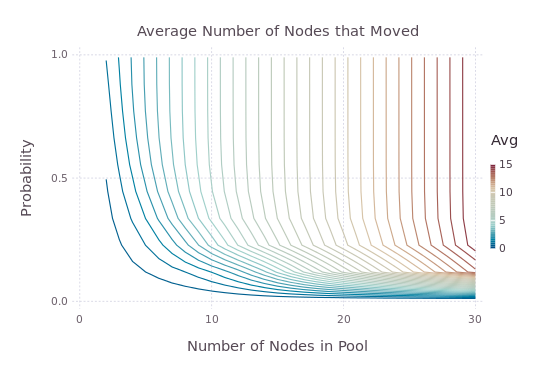

In [15]:
plot(z = moves, x = [x for x = 2:nodes], y = [x for x in probvalues],
Geom.contour(levels=30), Guide.xlabel("Number of Nodes in Pool"), 
Guide.ylabel("Probability"), Guide.title("Average Number of Nodes that Moved"), 
Guide.colorkey("Avg"))

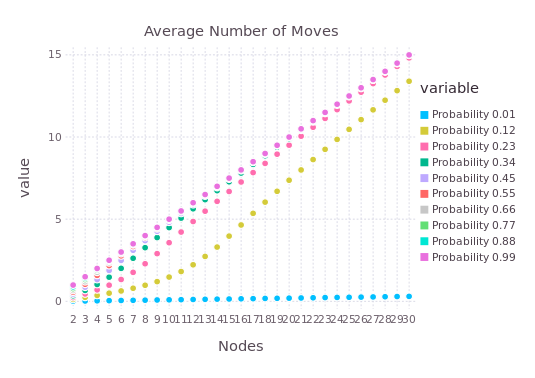

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in vect at abstractarray.jl:38
 in anonymous at no file
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /home/cfusting/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/cfusting/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[16], in expression starting on line 2


In [16]:
data = DataFrame([2:nodes moves])
names!(data, convert(Array{Symbol, 1}, 
["Nodes", [symbol("Probability $x") for x in round(probvalues, 2)]]))
dat = stack(data, [2:probs + 1]);
plot(dat, x = "Nodes", y = "value", color = "variable", Geom.point,
Guide.title("Average Number of Moves"), Stat.xticks(ticks = [x for x = 2:nodes]))

* Large $p$ values forecast more predictable outcomes given the initial number of nodes that move.
* Lower $p$ values lead to states that are less stable.
* Both node number and probabiilty play a role in predicting how many moves are expected.

The characteristics of a simple imitation model.
* If more nodes are available to imitate, the probability of a catalyst spreading increases.
* Likewise if nodes imitate with a higher probability spreading increases.

# Let's play a game.

Consider a network where each edge has weight $w \in A = (0,1)$ representing the probability of imitation. 
* We'll kick a node to start the process off.  
* If a node imitates another then the weight is increased by:

$$e_{ij_{t+1}} = e_{ij_{t}} + \alpha(1 - e_{ij_{t}})$$

* If a node fails to imitate another then the weight is decreased by:

$$e_{ij_{t+1}} = e_{ij_{t}} - \alpha e_{ij_{t}}$$

We have the same imiation scenario except the nodes are weighted and the weights can be adjusted.

In [20]:
"""
Given a symmetric weight matrix `W`, an ordered set of nodes that moved in the previous 
timestep, and a metric defining how to adjust the weights (when `dynamic = true`) 
evaluate and return an ordered set of nodes that moved and adjust the weights of `W` 
accordingly.
"""
function imitate(W, moved, metric; dynamic = true)
    #print("Nodes moved $moved\n")
    n = size(W, 1)
    nodes = setdiff(IntSet(1:n), moved)
    imitated = IntSet()
    for i in nodes, j in moved
        if W[i,j] > rand()
            #print("$i imitated $j\n")
            push!(imitated, i)
            if dynamic metric(W, i, j) end 
        else
            if dynamic metric(W, i, j; strengthen = false) end
        end
    end
    imitated
end

imitate (generic function with 2 methods)

In [21]:
"""
Changes the probabilistic weight of the edge between two nodes.
"""
function tenth(W, i, j; strengthen = true)
    if strengthen
        p = W[i,j] + 1/10 * (1 - W[i,j])
    else
        p = W[i,j] - 1/10 * W[i,j]
    end
    #print("New distance $dist\n")
    W[i,j] = p
    W[j,i] = p
end

tenth (generic function with 1 method)

Let's examine a very simple case to start.

Consider fully connected networks.

In [22]:
"""
Get a fully connected network of `n` nodes.
"""
function getperfect(n::Int, p::Float64)
    W = zeros(n, n)
    for i in 1:n
        for j in i+1:n
            W[i,j] = p
            W[j,i] = p
        end
    end
    W
end

getperfect (generic function with 1 method)

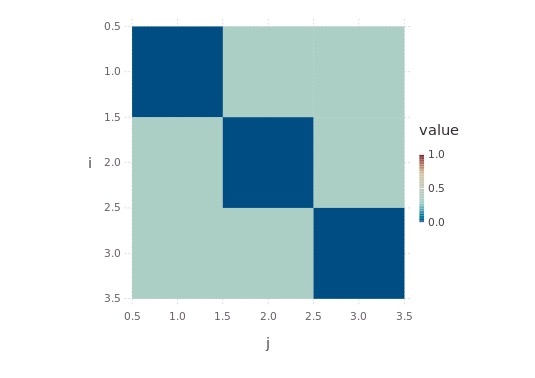

In [23]:
spy(getperfect(3,1/3), Scale.color_continuous(minvalue=0, maxvalue=1))

To better understand how the network as a whole has changed, we examine the mean weight.

In [24]:
"""
Given an undirected adjacency matrix of weights `W` compute the mean
weight between nodes.
"""
function meanweight(W)
    tot = 0.0
    ctr = 0
    for i in 1:size(W, 2), j in i+1:size(W, 1)
        tot = tot + W[i,j] 
        ctr = ctr + 1
    end
    tot / ctr
end

meanweight (generic function with 1 method)

In [25]:
"""
Given `n` fully connected nodes connected with probability `p`, 
kick off a simulation in which `move` nodes move and the remaining nodes 
imitate and update their distances accordingly. Limit to `ϵ` change in mean 
distance or `itr` iterations. Force the algorithm to run all `itr` with 
`force = true`.
"""
function simstaticcomp(W::Array{Float64, 2}; move::Int = 1, ϵ = 0.0001, 
    itr::Int = 10^3, force::Bool = false)
    n = size(W, 1)
    dist = Float64[]
    weights = Array{Float64, 2}[] 
    nodemoved = Array{Int, 1}[]
    p = Progress(itr, 1)
    ctr = 1
    emax = 10^2
    ectr = 1
    nodes = []
    ldist = 1
    while ctr <= itr && (force || ectr <= emax)
        if length(nodes) == 0
            nodes = IntSet(sample(collect(1:n), move, replace = false))
            #print(nodes,"\n")
        end
        push!(nodemoved, collect(nodes))
        nodes = imitate(W, nodes, tenth)
        push!(weights, copy(W))
        cdist = meanweight(W)
        push!(dist, cdist)
        #print("ldist: $ldist | cdist: $cdist\n")
        if abs(ldist - cdist) < ϵ
            ectr = ectr + 1
        else
            ectr = 1
        end
        ldist = cdist
        ctr = ctr + 1
        next!(p)
    end
    (dist, weights, nodemoved)
end

simstaticcomp (generic function with 1 method)

Now let's take a fully connected network and kick a node.
* If nodes stop moving, kick another.
* Record the average weight at each timestep.
* If the mean weight stops changing, kill the process and save your cycles.

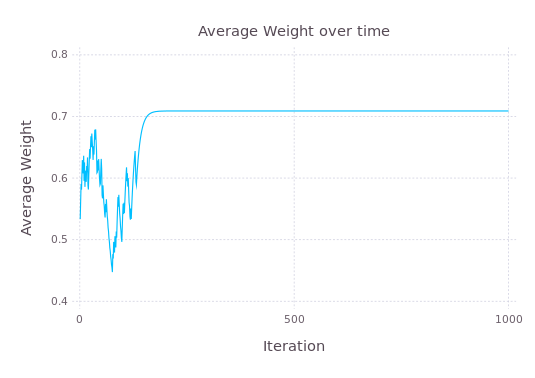

In [26]:
W = getperfect(3, .5)
(dist, weights, nodemoved) = simstaticcomp(W, force = true);
plot(x = [x for x = 1:length(dist)], 
y = [dist[i] for i = 1:length(dist)], 
Guide.xlabel("Iteration"), Guide.ylabel("Average Weight"),
Guide.title("Average Weight over time"),
Geom.line)

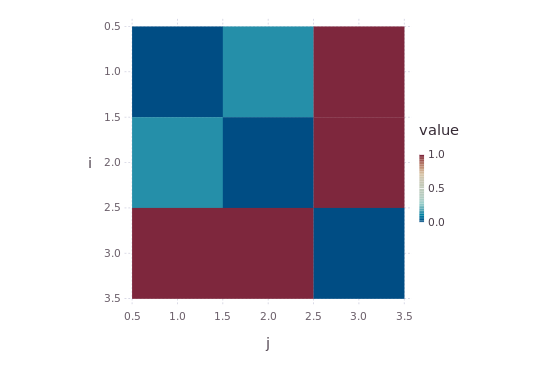

In [27]:
spy(weights[end], Scale.color_continuous(minvalue=0, maxvalue=1))

<img src="img/cycle.jpg" />

* Often, we find nodes tend toward $0$ or $1$ such that the network finds a steady state.
* However it's possible for components to develop edges in other states. 
* This occurs when the imitation cycle oscillates between positions that prevent the odd edge from being considered.

In [28]:
function cleanweights(W, ϵ = .001)
    for i in 1:size(W, 1), j in 1:size(W, 2)
        if W[i,j] < ϵ
            W[i,j] = 0
        elseif W[i,j] > 1 - ϵ
            W[i,j] = 1
        end
    end
end

cleanweights (generic function with 2 methods)

In [29]:
cleanweights(weights[end])
weights[end]

3x3 Array{Float64,2}:
 0.0       0.126915  1.0
 0.126915  0.0       1.0
 1.0       1.0       0.0

We'd like to better understand the relationship between these steady state weight motifs and the number of nodes.

In [30]:
"""
Look for unique weight motifs that arise from an imitation simulation of `n` nodes 
fully connected with probability `p`.
"""
function getdistmotifs(n, p; itr = 10^2)
    motifs = Set{Array{Float64, 2}}()
    for i in 1:itr
        (dist, weights) = simstaticcomp(getperfect(n, p))
        W = copy(weights[end])
        cleanweights(W)
        if !(W in motifs) 
            push!(motifs, W)
        end
    end
    motifs
end

getdistmotifs (generic function with 1 method)

In [31]:
motifs = getdistmotifs(3, .2, itr = 10^1)

Set([
3x3 Array{Float64,2}:
 0.0  0.0  1.0
 0.0  0.0  0.0
 1.0  0.0  0.0,

3x3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  1.0
 0.0  1.0  0.0,

3x3 Array{Float64,2}:
 0.0  1.0  0.0
 1.0  0.0  0.0
 0.0  0.0  0.0,

3x3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0])

A Cursory analysis finds the frequency of unique "weight motifs" is a function of node number and probability.

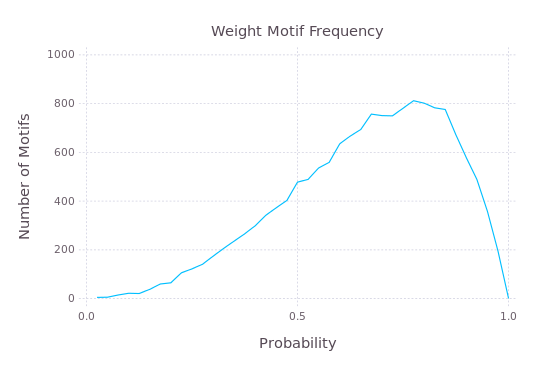

In [32]:
prob = collect(.025:.025:1)
n = 3
plot(x = [x for x in prob], 
y = [length(getdistmotifs(n, x, itr = 10^3)) for x in prob],
Guide.xlabel("Probability"), Guide.ylabel("Number of Motifs"),
Guide.title("Weight Motif Frequency"),
Geom.line)

Having explored fully connected networks we now consider Erdős–Rényi random networks in which edges are randomly weighted uniformly.

In [33]:
"""
With probabilty of connection `p` generate a random symmetric adjacency matrix of 
uniformly distributed weights between 0 and 1.
"""
function randomweights(n, p, divider) 
    W = zeros(n, n)
    for i in 1:n, j in i+1:n
        if p > rand()
            r = rand() / divider
            W[i,j] = r
            W[j,i] = r
        end
    end
    W
end

randomweights (generic function with 1 method)

Given an ER random network with random weights, how does the structure change as $t \to \infty$?

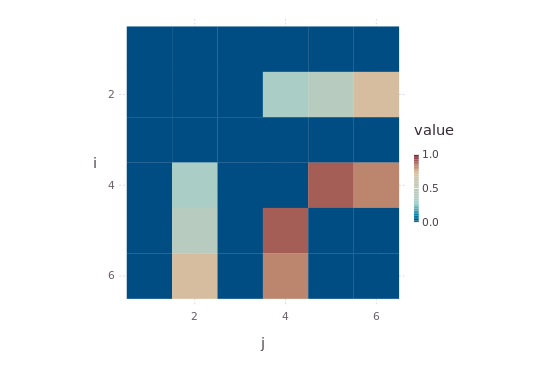

In [34]:
n, p, div = 6, 1/2, 1
W = randomweights(n, p, div)
round(W, 3)
spy(W, Scale.color_continuous(minvalue=0, maxvalue=1))

Iterations: 1001

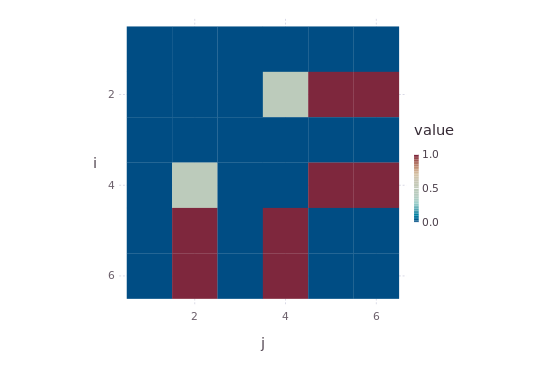

In [35]:
nodes = IntSet(sample(collect(1:n), 2, replace = false))
ctr, itr = 1, 10^3
while length(nodes) > 0 && ctr <= itr
    nodes = imitate(W, nodes, tenth)
    #print("nodes : $(length(nodes)), ctr : $ctr \n")
    ctr = ctr + 1
end
print("Iterations: $ctr")
round(W, 3)
spy(W, Scale.color_continuous(minvalue=0, maxvalue=1))

Nodes strengthen and weaken bonds to nearly $1$ or $0 \pm \epsilon_{machine}$.

* Given a random network with random weights, nodes organize themselves into trust components.
* Recall in ER networks we don't have triangles like we did in the fully connected example - thus we don't see weight motifs.

## Components 
Let's explore how components of a network change over time within an ER space.
* This time we'll make the weights static.
* This is a fair game with a fair start.

In [36]:
"""
With probabilty of connection `p` create a symmetric adjacency matrix of 
weights of weight `w`.
"""
function staticweights(n, p, w)
    W = zeros(n, n)
    for i in 1:n, j in i+1:n
        if p > rand()
            W[i,j] = w
            W[j,i] = w
        end
    end
    W
end

staticweights (generic function with 1 method)

In [37]:
"""
Create an undirected graph without self loops from a weigth matrix.
"""
function graphfromweights(W)
    n = size(W, 1)
    g = Graph(n)
    for i in 1:n, j in i+1:n
        if W[i,j] > 0 
            add_edge!(g, i, j)
        end
    end
    g
end

graphfromweights (generic function with 1 method)

To understand how components change define the distance metric:

$$
d_{i,j} = 1 - w_{i,j}
$$

Each component has some mean distance:

$$
c_d = \frac{1}{N} \sum_{i,j \in \Omega, i \neq j} d_{i,j}
$$

In [38]:
function visit(node, D, vis, counted, last = 0)
    #print("Visiting node $(node)!\n")
    dist = 0
    for i in 1:size(D, 2)
        if i != last && D[i, node] < 1 
            if !((i, node) in counted)
                push!(counted, (i, node))
                push!(counted, (node, i))
                dist = dist + D[i, node]
            end
            if !(i in vis)
                push!(vis, i)
                dist = dist + visit(i, D, vis, counted, node)
            end
        end
    end 
    dist
end

visit (generic function with 2 methods)

In [39]:
"""
Calculate the total distance between nodes connected to `node` in `W`.
"""
function distance(W, node)
    vis = IntSet()
    counted = Set()
    D = 1 - W
    n = size(D, 2)
    push!(vis, node)
    visit(node, D, vis, counted)
end

distance (generic function with 1 method)

In [40]:
type Component
    nodes::Array{Int}
    avgdist::Float64
    avgdeg::Float64
    size::Int
    
    Component(nodes, avgdist, avgdeg) = new(nodes, avgdist, avgdeg, length(nodes))
end

In [41]:
function calccompdist(g, W)
    res = Component[]
    coms = connected_components(g) 
    degrees = degree(g)
    for i in coms
        if length(i) > 1
            avgdeg = mean(degrees[i])
            dist = distance(W, i[1]) / length(i)
            push!(res, Component(i, dist, avgdeg))
        end
    end
    res
end

calccompdist (generic function with 1 method)

It's actually quite difficult to build an ER network that has multiple components.

In [42]:
n,p,w = 100, 1/90, 1/2
W = staticweights(n, p, w)
g = graphfromweights(W)
coms = calccompdist(g,W)

15-element Array{Component,1}:
 Component([1,33,72],0.3333333333333333,1.3333333333333333,3)                   
 Component([2,14,23,24,83],0.4,1.6,5)                                           
 Component([4,12,13,15,36,43,45,49,51,55,66,69,71,84,87,89,95,96,99],0.5,2.0,19)
 Component([16,32,42,97],0.375,1.5,4)                                           
 Component([17,25,53],0.3333333333333333,1.3333333333333333,3)                  
 Component([18,26,38,98],0.375,1.5,4)                                           
 Component([19,68],0.25,1.0,2)                                                  
 Component([22,34,37,44,56,57,67,74],0.4375,1.75,8)                             
 Component([27,64,65,76],0.375,1.5,4)                                           
 Component([28,52],0.25,1.0,2)                                                  
 Component([46,54,79,100],0.375,1.5,4)                                          
 Component([48,63,78],0.3333333333333333,1.3333333333333333,3)                

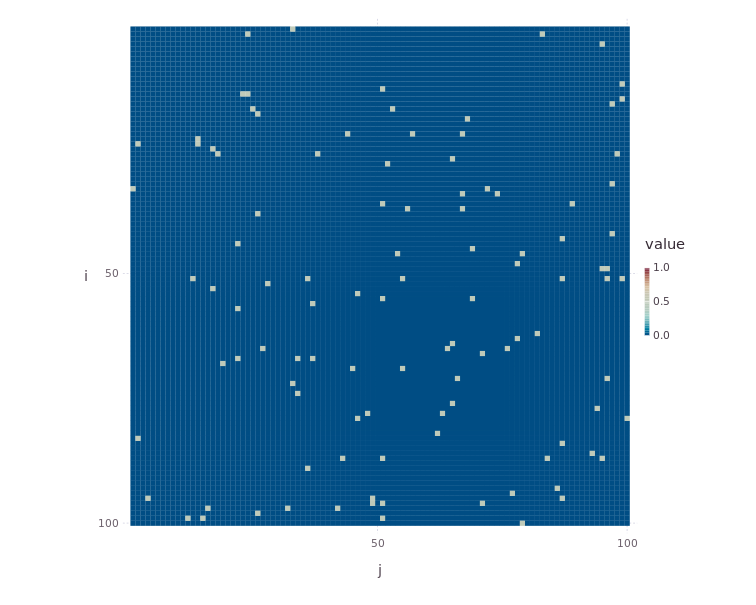

In [43]:
set_default_plot_size(20cm, 16cm)
spy(W, Scale.color_continuous(minvalue=0, maxvalue=1))

Here we have an adjacency matrix representing connections all of $\frac{1}{2}$.

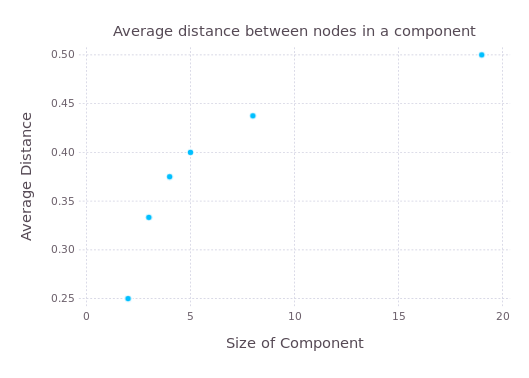

In [44]:
set_default_plot_size(14cm, 10cm)
plot(x = [coms[i].size for i = 1:length(coms)], 
y = [coms[i].avgdist for i = 1:length(coms)], 
Guide.xlabel("Size of Component"), Guide.ylabel("Average Distance"),
Guide.title("Average distance between nodes in a component"),
Geom.point)

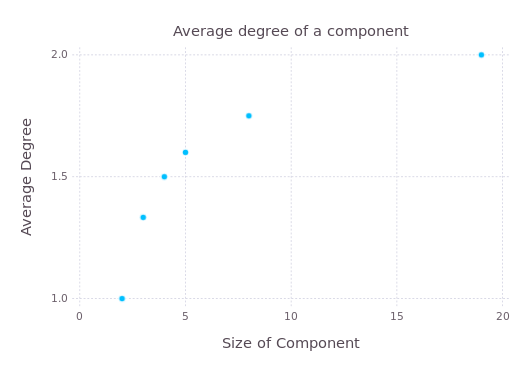

In [45]:
plot(x = [coms[i].size for i = 1:length(coms)], 
y = [coms[i].avgdeg for i = 1:length(coms)], 
Guide.xlabel("Size of Component"), Guide.ylabel("Average Degree"),
Guide.title("Average degree of a component"),
Geom.point)

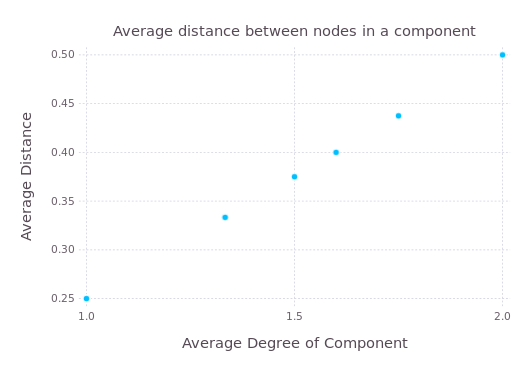

In [46]:
plot(x = [coms[i].avgdeg for i = 1:length(coms)], 
y = [coms[i].avgdist for i = 1:length(coms)], 
Guide.xlabel("Average Degree of Component"), Guide.ylabel("Average Distance"),
Guide.title("Average distance between nodes in a component"),
Geom.point)

Now kick off a simulation that runs for a set number of iterations. If nodes stop moving, kick one.

In [47]:
move = 50
ctr = 1
itr = 10^6
p = Progress(itr, 1)
while ctr < itr
    if length(nodes) == 0
        nodes = IntSet(sample(collect(1:n), move, replace = false))
    end
    nodes = imitate(W, nodes, tenth)
    ctr = ctr + 1
    next!(p)
end
coms = calccompdist(g, W);

Progress:  99%  ETA: 0:00:01

In [48]:
coms

15-element Array{Component,1}:
 Component([1,33,72],0.35000000000000003,1.3333333333333333,3)                                   
 Component([2,14,23,24,83],0.3268667699,1.6,5)                                                   
 Component([4,12,13,15,36,43,45,49,51,55,66,69,71,84,87,89,95,96,99],0.051368405663773146,2.0,19)
 Component([16,32,42,97],0.37277151374999995,1.5,4)                                              
 Component([17,25,53],0.35000000000000003,1.3333333333333333,3)                                  
 Component([18,26,38,98],0.382509548625,1.5,4)                                                   
 Component([19,68],0.25249999999999995,1.0,2)                                                    
 Component([22,34,37,44,56,57,67,74],0.4094688125,1.75,8)                                        
 Component([27,64,65,76],0.3514947375,1.5,4)                                                     
 Component([28,52],0.25,1.0,2)                                                         

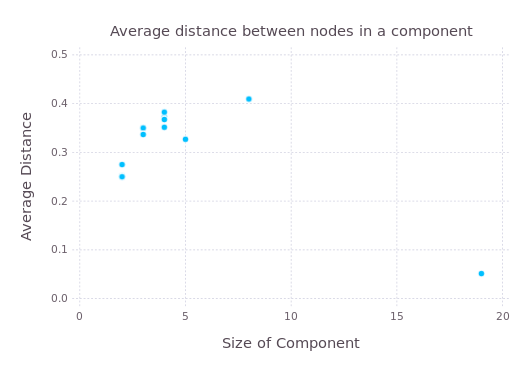

In [49]:
plot(x = [coms[i].size for i = 1:length(coms)], 
y = [coms[i].avgdist for i = 1:length(coms)], 
Guide.xlabel("Size of Component"), Guide.ylabel("Average Distance"),
Guide.title("Average distance between nodes in a component"),
Geom.point)

Note how the distance between the highly connected node drops while the distance between the less connected nodes rises. 

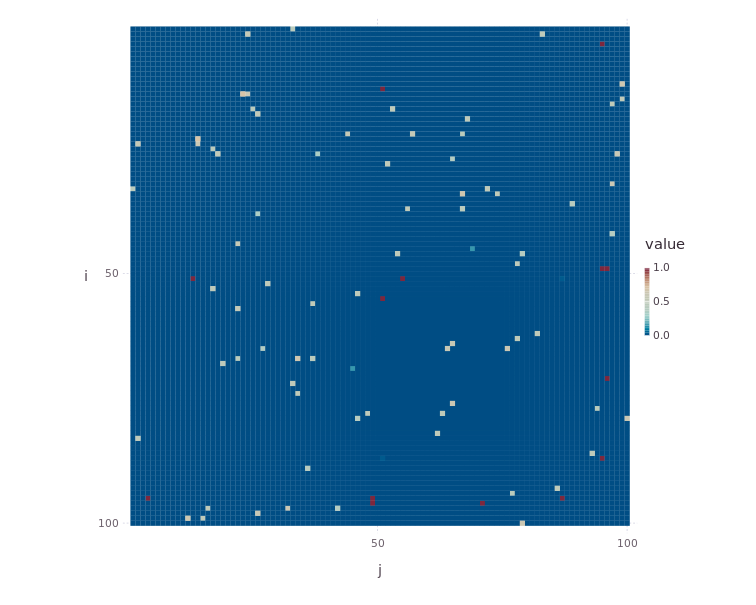

In [50]:
set_default_plot_size(20cm, 16cm)
spy(W, Scale.color_continuous(minvalue=0, maxvalue=1))

Here we see the resulting behavior in the adjacency matrix. What makes this interesting is that trust networks form more readily in highly connected components.

In [51]:
set_default_plot_size(14cm, 10cm)